#пункт1 
**Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора.**

**Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.**

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#data=np.loadtxt(open("/content/drive/My Drive/Colab Notebooks/tic_tac_toe.txt"), dtype=str, delimiter=',')
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/tic_tac_toe.csv")

In [ ]:
data

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


Выделим значения метки класса в переменную labels, признаковые описания --- в переменную feature_matrix. 

In [ ]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[:-1]].values

переведем стринг в инт(флоат)

In [ ]:
for i in range(957):
  for j in range(9):
    if feature_matrix[i][j]=='x':
      feature_matrix[i][j]=1
    if feature_matrix[i][j]=='o':
      feature_matrix[i][j]=0
    if feature_matrix[i][j]=='b':
      feature_matrix[i][j]=2

In [ ]:
feature_matrix

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 2, 2],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]], dtype=object)

С её помощью можно разбить выборку на обучающую и тестовую части.

In [ ]:
from sklearn.model_selection import train_test_split

Параметр test_size контролирует, какая часть выборки будет тестовой.

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

**Создание модели**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

**Обучение модели**

In [ ]:
model = gnb.fit(train_feature_matrix, train_labels)

In [ ]:
y_pred = gnb.predict(test_feature_matrix)

In [ ]:
print(y_pred)

**Проверка качества обученной модели**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.7291666666666666

**Спам**

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/spam.csv")

In [ ]:
data.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,num000,money,hp,hpl,george,num650,lab,labs,telnet,num857,data,num415,num85,technology,num1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [ ]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[:-1]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
gnb = GaussianNB()

In [ ]:
model = gnb.fit(train_feature_matrix, train_labels)

In [ ]:
y_pred = gnb.predict(test_feature_matrix)

In [ ]:
accuracy_score(test_labels, y_pred)

0.8523344191096635

# Пункт3 
**##Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки.**

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/glass.csv")

In [ ]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


не включаем id

In [ ]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[1:-1]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:
>  число соседей n_neighbors

> метрика расстояния между объектами metric

> веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос") weights


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(train_feature_matrix, train_labels)
y_train_predict = knn.predict(train_feature_matrix)
y_test_predict = knn.predict(test_feature_matrix)

err_train = np.mean(train_labels != y_train_predict)
err_test  = np.mean(test_labels  != y_test_predict)
print (err_train, err_test)

0.17543859649122806 0.2558139534883721


гридсерч нужен для поиска наилучшего варианта из заданных параметров)0

In [ ]:
"manhattan", "euclidean", "chebyshev"

In [ ]:
knn = KNeighborsClassifier()

params = {'n_neighbors' : [1,2,3,4,5],

         'metric': ["minkowski", "manhattan", "euclidean", "chebyshev"],

         'weights': ['uniform','distance'],

          'algorithm': ["brute", "ball_tree", "KD_tree","auto"],

          'leaf_size': ['BallTree', 'KDTree']} 

knn_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)

knn_grid.fit(train_feature_matrix, train_labels)

y_pred = knn_grid.predict(test_feature_matrix)

a=accuracy_score(test_labels, y_pred)
print(a)

0.7906976744186046


In [ ]:
y_train_predict = knn_grid.predict(train_feature_matrix)
y_test_predict = knn_grid.predict(test_feature_matrix)

err_train = np.mean(train_labels != y_train_predict)
err_test  = np.mean(test_labels  != y_test_predict)
print (err_train, err_test)

Определите подходящие метрики расстояния и исследуйте, как тип метрики
расстояния влияет на точность классификации.

In [ ]:
print(knn_grid.best_params_)

{'algorithm': 'brute', 'leaf_size': 'BallTree', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


**Определите, к какому типу стекла относится экземпляр с характеристиками:**

Ответ:5 (по лучшим параметрам кн)

In [ ]:
row = [1.516,11.7,1.01,1.19,72.59,0.43,11.44,0.02,0.1]
print('Predicted=%d' % (knn_grid.predict([row])))


Predicted=5


проверка

In [ ]:
row = [1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00]
print('>Predicted=%d' % (knn_grid.predict([row])))

>Predicted=1


In [ ]:
row = [1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.00]
print('>Predicted=%d' % (knn_grid.predict([row])))

>Predicted=7


In [ ]:
data.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Пункт5.

Постройте классификаторы для различных данных на основе деревьев решений:

А. Загрузите набор данных Glass из файла glass.csv.

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/glass.csv")

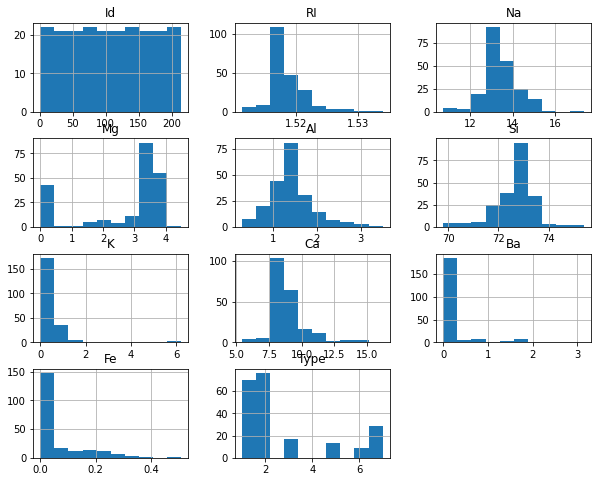

In [ ]:
from matplotlib import pyplot
data.hist()
# show the plot
pyplot.show()

In [ ]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[1:-1]].values

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

Постройте дерево классификации для модели, предсказывающей тип (Type) по
остальным признакам.

#Пункт6.
Загрузите набор данных из файла bank_scoring_train.csv. Это набор финансовых данных, характеризующий физических лиц.

In [ ]:
bstrain=pd.read_csv("/content/drive/My Drive/Colab Notebooks/bank_scoring_train.csv", delimiter='\t')

Целевым столбцом является «SeriousDlqin2yrs»,
означающий, ухудшится ли финансовая ситуация у клиента.

In [ ]:
bstrain

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.975614,39,1,0.678552,1850.0,4,0,0,0,3.0
1,0,0.006634,75,0,0.082087,10500.0,21,0,1,0,0.0
2,0,0.227432,48,1,0.202145,6059.0,9,0,1,0,3.0
3,0,0.290217,59,0,0.674392,4400.0,6,0,2,0,0.0
4,0,0.000000,80,0,0.000000,2596.0,2,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
96211,0,0.006418,55,0,0.216344,6558.0,6,0,1,0,0.0
96212,0,0.482536,37,0,0.359012,3400.0,8,0,1,0,2.0
96213,0,0.144630,56,0,0.178698,10167.0,7,0,1,0,2.0
96214,0,0.077271,77,0,1.187906,2000.0,17,0,2,0,0.0


Постройте систему по
принятию решения о выдаче или невыдаче кредита физическому лицу. Сделайте как
минимум 2 варианта системы на основе различных классификаторов.

In [ ]:
#print(bstrain.SeriousDlqin2yrs.unique())
print((bstrain.SeriousDlqin2yrs.value_counts()))

0    89592
1     6624
Name: SeriousDlqin2yrs, dtype: int64


When ‘SeriousDlqin2yrs’ == 0, this means, this customer is not a concern for the bank and when it is 1, its highly probable that the customer might default. 

In [ ]:
train_labels = bstrain[bstrain.columns[0]].values
train_feature_matrix = bstrain[bstrain.columns[0:]].values

In [ ]:
bstest=pd.read_csv("/content/drive/My Drive/Colab Notebooks/bank_scoring_test.csv", delimiter='\t')
test_labels = bstest[bstest.columns[0]].values
test_feature_matrix = bstest[bstest.columns[0:]].values

на основе наивного байеса:

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train_feature_matrix, train_labels)

from sklearn.metrics import accuracy_score

y_pred = gnb.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.9342285785556895

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
gnb = GaussianNB()
params = {'var_smoothing': np.logspace(0,-9, num=100)}
skf = StratifiedKFold(n_splits=10)
gs = GridSearchCV(gnb, cv=skf, param_grid=params, return_train_score=True)
model = gs.fit(train_feature_matrix, train_labels)

from sklearn.metrics import accuracy_score

y_pred = gs.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.9342285785556895

In [ ]:
print(gs.best_params_)

{'var_smoothing': 1e-09}


кнн:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

In [ ]:
params = {'n_neighbors' : [1,2,3],

         'metric': ["minkowski", "manhattan", "euclidean", "chebyshev"],

         'weights': ['uniform','distance'],

          'algorithm': ["brute", "ball_tree", "KD_tree","auto"],

          'leaf_size': ['BallTree', 'KDTree']} 

In [ ]:
knn_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
knn_grid.fit(train_feature_matrix[1:100], train_labels[1:100])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['brute', 'ball_tree', 'KD_tree', 'auto'],
                         'leaf_size': ['BallTree', 'KDTree'],
                         'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'chebyshev'],
                         'n_neighbors': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

ограничение данных на первые 100 делалось потому что он оч долго считал, можно убрать в принципе

In [ ]:
y_pred = knn_grid.predict(test_feature_matrix[1:100])

In [ ]:
a=accuracy_score(test_labels[1:100], y_pred)
print(a)

0.9292929292929293


In [ ]:
print(knn_grid.best_params_)

{'algorithm': 'brute', 'leaf_size': 'BallTree', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


Подберите
подходящую метрику качества работы системы исходя из специфики задачи и
определите, принятие решения какой системой сработало лучше на bank_scoring_test.csv.

[остальные пункты ](https://colab.research.google.com/drive/1s24BQfyw8fo5MQS7QL_2vAbjQqEYG9Zk?usp=sharing)

[отчет](https://drive.google.com/file/d/1HlqcKWNVBM-ZvaKJf-nfQ7R-xZgoSZtU/view?usp=sharing)